# Multiprocessing:

The **multiprocessing library** is Python's standard library to support parallel computing using processes.

See documentation here:

https://docs.python.org/3/library/multiprocessing.html

In [1]:
import multiprocessing as mp

Let's first print out the total number of CPUs that on my machine that can be used for parallel computing.

In [2]:
print(f"Number of CPU cores: {mp.cpu_count()}")

Number of CPU cores: 14


Let's use an example to show you how to use multiple cores in one machine to reduce the time of execution time. 

### Example 1:

The script below generates $10^7$ random numbers between $0$ and $10$ and square the numbers

You can edit the file with ```vim``` into your workig directory, or download it from the repository:

https://github.com/wbandabarragan/computational-physics-2/blob/main/unit-3/random_square.py

```bash
vim random_square.py 
```

```Python
#!/opt/anaconda3/envs/py39/bin/python
"""
Script to generate 10 million random numbers.
"""
# Import modules
import numpy as np

# Random number function
def random_square(seed):
    """
    Square a random number generated witn an input seed.
    """
    # Allocate seed
    np.random.seed(seed)

    # Generate random number
    random_num = np.random.randint(0, 10)

    # Return squared values
    return random_num**2
```



#### A) Serial version:

We call the script in a ```for``` loop for range(100000):

In [3]:
# Import libraries
import numpy as np
import time

# Import our own module
import random_square

In [4]:
# Timing the code
start = time.time()

# Empty  list for results 
results = []

# Loop up to 10^7
for i in range(10000000): 
    results.append(random_square.random_square(i))

# Finish timing code
end = time.time()

# Serial execution time
t_serial = end - start

print(f'Serial execution time is {t_serial} s')

Serial execution time is 22.68006706237793 s


#### B) Parallel version

The simplest way to do parallel computing using the multiprocessing is to use the **Pool** class.

See documentation:

https://superfastpython.com/multiprocessing-pool-map/

https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool


There are 4 common methods in the class that we may use often, that is:

1. **apply**, 


2. **map**, 


3. **apply_async** and 


4. **map_async**.

Have a look of the documentation for the differences, and we will only use **map** function below to parallel the above example.

The **map(func, iterable)** function takes in two arguments, and apply the function **func** to each element in the **iterable**, and then collect the results. 

In [5]:
# Timing the code
start = time.time()

# Get number of laptop CPUs
n_cpu = mp.cpu_count()
print("The number of CPU cores is: ", n_cpu)

# Call Pool
pool = mp.Pool(processes=n_cpu)

# Call pool.map(func, iterable)
results = [pool.map(random_square.random_square, range(10000000))]

# Finish timing code
end = time.time()

# Serial execution time
t_parallel = end - start

print(f'Serial execution time is {t_parallel} s')

The number of CPU cores is:  14
Serial execution time is 3.04467511177063 s


### Code speedup:

In [6]:
# Speed up

print("Speedup factor: ", t_serial/t_parallel)
print("Expected speedup factor: ", n_cpu/1.)

Speedup factor:  7.449092671562038
Expected speedup factor:  14.0


#### Notes:

- We can see that using the above parallel version of the code, we reduce the run time from 22.50039768218994 s to 3.081364154815674 s. This is a big gain in speed, especially if we have a heavy computation, it will reduce a lot of time by running parallel computing. 

- The `pool.apply` function is similar except that it can accept more arguments. The `pool.map` and `pool.apply` will lock the main program until all the processes are finished, which is quite useful if we want to obtain results in a particular order for some applications.

- In contrast, if we do not need the results in a particular order, we can also use `pool.apply_async` or `pool.map_async`, which will submit all processes at once and retrieve the results as soon as they are finished. Check documentation to learn more. 

## Visualise the execution time for different number of CPU cores:

Let's visualise the execution time changes versus the number of data points using both the serial and parallel version.

We will see that until certain point, it is better to use the serial version. 

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Serial function
def serial(n):
    """
    Function for serial execution.
    """
    # Time stamp
    start = time.time()
    results = []

    # Loop
    for i in range(n):
        results.append(random_square.random_square(i))

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

# Parallel function
def parallel(n, n_cpu):
    """
    Function for parallel execution.
    Inputs: n -> # instances
    Outputs: n_cpu -> # of cores
    """
    # Time stamp
    start = time.time()

    # Call multiprocessing Pool -> Create processes
    pool = mp.Pool(processes=n_cpu)

    # Allocate tasks into the pool
    results = [pool.map(random_square.random_square, range(n))]

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

## Runninng on all the CPU cores:

In [9]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

n_cpu = mp.cpu_count()
#print(n_run)

# Call functions for each n_run[i]
t_serial = np.array([serial(int(n)) for n in n_run])
t_parallel = np.array([parallel(int(n), n_cpu) for n in n_run])

# Check outputs
#print(t_serial)
#print(t_parallel)

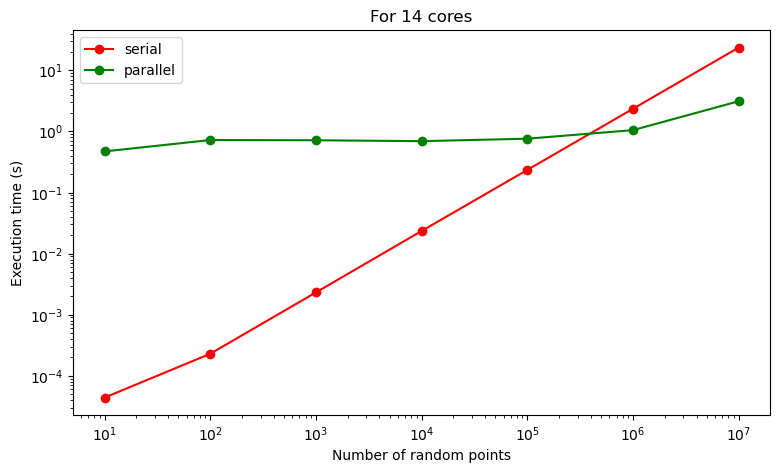

In [10]:
plt.figure(figsize = (9, 5))

plt.title(f"For {n_cpu} cores")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()

## Runninng on 4 cores:

In [11]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

n_cpu = 4 #mp.cpu_count()
#print(n_run)

# Call functions for each n_run[i]
t_serial = np.array([serial(int(n)) for n in n_run])
t_parallel = np.array([parallel(int(n), n_cpu) for n in n_run])

# Check outputs
#print(t_serial)
#print(t_parallel)

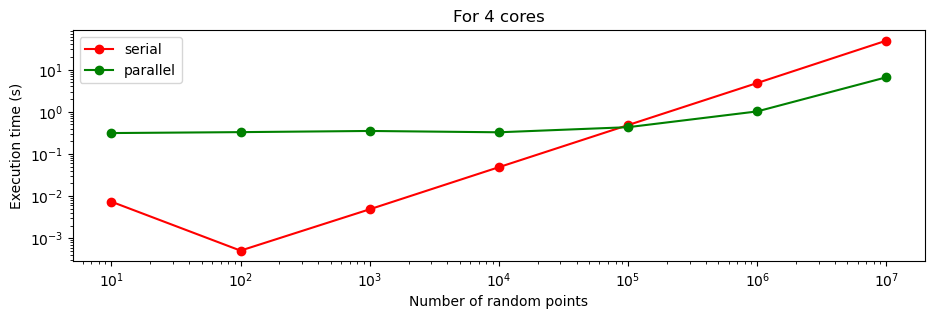

In [17]:
plt.figure(figsize = (11, 3))

plt.title(f"For {n_cpu} cores")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()

### Conclusions:

- The above times and plots can very from PC to PC depending on the architectures.

- We can see from the figures that when the number of data points are small (below $\sim 10^5$), the execution time for the serial version is faster due to the overheads of the parallel version from launching and maintaining the new processes. But after that, we can see clearly the winner be the parallel version. 

## Running multiprocessing tests on the HPC Cedia Cluster

The script below should be edited/scp into the HPC Cedia Cluster to test parallelisation performance there. The script returns a figure and also the data to make the figure in a CSV file.


### Python Script:

```bash
vim test_mp.py
```

```Python
"""
Script to compute execution times.
"""
# Import libraries
import time
import csv
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import random_square

# Serial function
def serial(n):
    """
    Function for serial execution.
    """
    # Time stamp
    start = time.time()
    results = []

    # Loop
    for i in range(n):
        results.append(random_square.random_square(i))

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

# Parallel function
def parallel(n, n_cpu):
    """
    Function for parallel execution.
    Inputs: n -> # instances
    Outputs: n_cpu -> # of cores
    """
    # Time stamp
    start = time.time()

    # Call multiprocessing Pool -> Create processes
    pool = mp.Pool(processes=n_cpu)

    # Allocate tasks into the pool
    results = [pool.map(random_square.random_square, range(n))]

    # Time stamp
    end = time.time()
    exec_time = end - start

    return exec_time

# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

# Call functions for each n_run[i]

t_serial = np.array([serial(int(n)) for n in n_run])

t_parallel_n02 = np.array([parallel(int(n), 2) for n in n_run])
t_parallel_n04 = np.array([parallel(int(n), 4) for n in n_run])
t_parallel_n08 = np.array([parallel(int(n), 8) for n in n_run])
t_parallel_n16 = np.array([parallel(int(n), 16) for n in n_run])

# Plotting
plt.figure(figsize = (9, 5))

plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel_n02, '-o', color = "green", label = 'parallel: n=2')
plt.plot(n_run, t_parallel_n04, '-o', color = "blue", label = 'parallel: n=4')
plt.plot(n_run, t_parallel_n08, '-o', color = "magenta", label = 'parallel: n=8')
plt.plot(n_run, t_parallel_n16, '-o', color = "brown", label = 'parallel: n=16')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.savefig("hpc_cedia_mp.png")
plt.close()

# Saving execution data in a CSV file
with open("hpc_cedia_mp.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Header row
    writer.writerow(["n_run", "serial", "parallel_2", "parallel_4", "parallel_8", "parallel_16"])
    # Data row
    for j in range(len(n_run)):
        writer.writerow([n_run[j], t_serial[j], t_parallel_n02[j], t_parallel_n04[j],\
                       t_parallel_n08[j], t_parallel_n16[j]])
```



### Batch script:

Adjust the resources as needed:

```bash
vim job_mp.py
```

```bash
#!/bin/bash
#SBATCH --job-name=job_mp
#SBATCH --partition=cpu
#SBATCH --time=00:05:00
#SBATCH --cpus-per-task=16
#SBATCH --mem=1G
#SBATCH --output=job_mp.out
#SBATCH --error=job_mp.err

# Your commands go here
source ~/.bashrc
conda activate py310
python test_mp.py
```

### Batch job submission:
```bash
sbatch job_mp.py
```

### Results:
The figure I obtained can be seen here:

https://github.com/wbandabarragan/computational-physics-2/blob/main/unit-3/hpc_cedia_mp.png

There is not much of a gain in distributing the tasks among more CPU cores.

Alternatively, we can also look at the CSV file and plot locally.

In [15]:
import pandas as pd

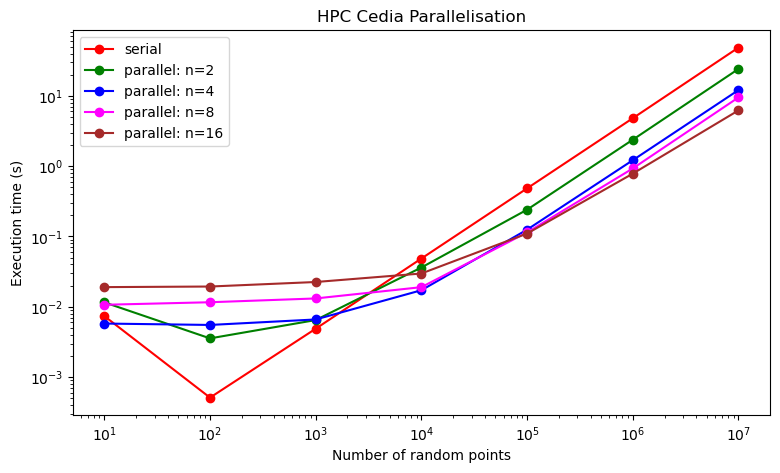

In [16]:
# Read execution data
df = pd.read_csv("./hpc_cedia_mp.csv")
#print(df)

n_run = np.array(df["n_run"])
t_serial = np.array(df["serial"])
t_parallel_n02 = np.array(df["parallel_2"])
t_parallel_n04 = np.array(df["parallel_4"])
t_parallel_n08 = np.array(df["parallel_8"])
t_parallel_n16 = np.array(df["parallel_16"])

# Plotting
plt.figure(figsize = (9, 5))
plt.title("HPC Cedia Parallelisation")
plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel_n02, '-o', color = "green", label = 'parallel: n=2')
plt.plot(n_run, t_parallel_n04, '-o', color = "blue", label = 'parallel: n=4')
plt.plot(n_run, t_parallel_n08, '-o', color = "magenta", label = 'parallel: n=8')
plt.plot(n_run, t_parallel_n16, '-o', color = "brown", label = 'parallel: n=16')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()
